<a href="https://colab.research.google.com/github/ujjwalbb30/Ujjwal_DATA606/blob/main/notebooks/Step_2_A_Basic_EDA_Image_Ujjwal_PF10610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA 606 : Capstone Project**
##**Course Instructor: Dr. Chaojie Wang**
>**Data Science Department**

>**University of Maryland, Baltimore County**

###**Submitted By: Ujjwal**
>**UMBC ID: PF10610**

##**Basic Exploratory Data Analysis (EDA): Part A - Image**



###**Installing Required Libraries**

In [ ]:
# installing tqdm and progressbar
!pip install progressbar
!pip install tqdm

###**Importing Required Libraries**

In [ ]:
# importing required dependencies

# importing pandas, numpy, random, matplotlib and their required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# importing other required libraries
import glob
import cv2
import skimage
from skimage.transform import resize
import gc
from progressbar import ProgressBar
from tqdm.notebook import tqdm_notebook
import shutil
import os
import random
try:
  from PIL import Image
except ImportError:
  import Image

###**Mounting the Drive and Copying the Data from Drive to Colab assigned machine**

From my previous experience, I have observed that copying the data to assigned colab machine helps in faster processing

In [ ]:
# mounting the drive to access data files
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# defining the path of data in drive (path to copy the data from)
# defining the path where the data should be copied

drive_path = '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset'
local_path = '/content'

# copying the data from drive to machine
!cp -av '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset' '/content'

##**Importing the final .csv file with paths and texts of all the images**

In [ ]:
# importing the dataset
imgpath_text_df = pd.read_csv(r'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Data_2/imgpath_text_df.csv')
display(imgpath_text_df)

,label,path,text,clean_text
0,Note,/content/Dataset/Note/2073440248.jpg,\n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...,arthur c padoan erz rvyelo iv g
1,Note,/content/Dataset/Note/2048858141.jpg,et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...,et ao cacgion cas py heap
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...
...,...,...,...,...
3487,Report,/content/Dataset/Report/507963083_507963090.jpg,104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...,dr rainer wendeborn thomas leutner rhone poule...
3488,Report,/content/Dataset/Report/507767713_507767722.jpg,\n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...,special public relations programs en backgroun...
3489,Report,/content/Dataset/Report/507745286_507745288.jpg,"\n\n \n\n \n\n& Tobacco Company Cot, Me ...",tobacco company cot me a bhi usyi horizon reta...
3490,Report,/content/Dataset/Report/510907182_510907183.jpg,MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...,maryland tobacco southern maryland tobacco boa...


##**Getting the format of each image whether .jpeg,.png or something else**

In [ ]:
# getting the type of image whether .png, .jpg, .jpeg etc and saving it in another column
img_format = []
for path in imgpath_text_df['path']:
  try:
    img = Image.open(path)
    img_format.append(img.format)
  except:
    img_format.append('None')

imgpath_text_df['format'] = img_format

display(imgpath_text_df)

,label,path,text,clean_text,format
0,Note,/content/Dataset/Note/2073440248.jpg,\n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...,arthur c padoan erz rvyelo iv g,JPEG
1,Note,/content/Dataset/Note/2048858141.jpg,et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...,et ao cacgion cas py heap,JPEG
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,JPEG
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,JPEG
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,JPEG
...,...,...,...,...,...
3487,Report,/content/Dataset/Report/507963083_507963090.jpg,104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...,dr rainer wendeborn thomas leutner rhone poule...,JPEG
3488,Report,/content/Dataset/Report/507767713_507767722.jpg,\n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...,special public relations programs en backgroun...,JPEG
3489,Report,/content/Dataset/Report/507745286_507745288.jpg,"\n\n \n\n \n\n& Tobacco Company Cot, Me ...",tobacco company cot me a bhi usyi horizon reta...,JPEG
3490,Report,/content/Dataset/Report/510907182_510907183.jpg,MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...,maryland tobacco southern maryland tobacco boa...,JPEG


In [ ]:
# viewing unique values
print(imgpath_text_df['format'].value_counts())

JPEG    3482
None      10
Name: format, dtype: int64


all the files are in **'.JPEG'** format

##**Getting the type of each image whether 'grayscale' or 'color'**

In [ ]:
# finding whether the image is 'grayscale' or 'color' and saving it in another column
# creating empty list to store 'image_type' value
img_type = []
for path in imgpath_text_df['path']:
  try:
    img = Image.open(path)
    img_type.append(img.mode)
  except:
    img_type.append('None')

imgpath_text_df['type'] = img_type

display(imgpath_text_df)

,label,path,text,clean_text,format,type
0,Note,/content/Dataset/Note/2073440248.jpg,\n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...,arthur c padoan erz rvyelo iv g,JPEG,L
1,Note,/content/Dataset/Note/2048858141.jpg,et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...,et ao cacgion cas py heap,JPEG,L
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,JPEG,L
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,JPEG,L
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,JPEG,L
...,...,...,...,...,...,...
3487,Report,/content/Dataset/Report/507963083_507963090.jpg,104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...,dr rainer wendeborn thomas leutner rhone poule...,JPEG,L
3488,Report,/content/Dataset/Report/507767713_507767722.jpg,\n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...,special public relations programs en backgroun...,JPEG,L
3489,Report,/content/Dataset/Report/507745286_507745288.jpg,"\n\n \n\n \n\n& Tobacco Company Cot, Me ...",tobacco company cot me a bhi usyi horizon reta...,JPEG,L
3490,Report,/content/Dataset/Report/510907182_510907183.jpg,MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...,maryland tobacco southern maryland tobacco boa...,JPEG,L


In [ ]:
# viewing unique values
print(imgpath_text_df['type'].value_counts())

L       3482
None      10
Name: type, dtype: int64


**'L'** means all the images are **grayscale images**

##**Getting the size i.e., height and width of images and saving them in separate columns**

In [ ]:
# finding the size of images
# making empty list to store height of images
img_size_h = []
# making empty list to store width of images
img_size_w = []

# iterating over the path to find image size and storing it
for path in imgpath_text_df['path']:
  try:
    img = Image.open(path)
    w,h = img.size
    img_size_h.append(h)
    img_size_w.append(w)
  except:
    img_size_h.append('None')
    img_size_w.append('None')

# saving them in original dataframe
imgpath_text_df['width(image)'] = img_size_w
imgpath_text_df['height(image)'] = img_size_h

display(imgpath_text_df)

,label,path,text,clean_text,format,type,width(image),height(image)
0,Note,/content/Dataset/Note/2073440248.jpg,\n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...,arthur c padoan erz rvyelo iv g,JPEG,L,1728,2292
1,Note,/content/Dataset/Note/2048858141.jpg,et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...,et ao cacgion cas py heap,JPEG,L,1728,2292
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,JPEG,L,2544,3296
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,JPEG,L,2400,3150
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,JPEG,L,2560,3296
...,...,...,...,...,...,...,...,...
3487,Report,/content/Dataset/Report/507963083_507963090.jpg,104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...,dr rainer wendeborn thomas leutner rhone poule...,JPEG,L,2544,3498
3488,Report,/content/Dataset/Report/507767713_507767722.jpg,\n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...,special public relations programs en backgroun...,JPEG,L,2544,3201
3489,Report,/content/Dataset/Report/507745286_507745288.jpg,"\n\n \n\n \n\n& Tobacco Company Cot, Me ...",tobacco company cot me a bhi usyi horizon reta...,JPEG,L,2544,3267
3490,Report,/content/Dataset/Report/510907182_510907183.jpg,MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...,maryland tobacco southern maryland tobacco boa...,JPEG,L,2544,3222


##**Exploring the height and width data of images, both, collectively and individually**

###**Getting their uniqe values and counts**

In [ ]:
# viewing the unique values and their counts
print('Unique values for Image height:\n')
print(imgpath_text_df['height(image)'].nunique())
print('\nCounts:\n')
display(imgpath_text_df['height(image)'].value_counts())

print('\nUnique values for Image width:\n')
print(imgpath_text_df['width(image)'].nunique())
print('\nCounts:\n')
display(imgpath_text_df['width(image)'].value_counts())

Unique values for Image height:

325

Counts:



2292    1752
3296     372
3300     102
3150      65
1575      63
        ... 
3358       1
3393       1
3420       1
4155       1
3498       1
Name: height(image), Length: 325, dtype: int64


Unique values for Image width:

39

Counts:



1728    1814
2560     789
2544     581
2400      65
1200      63
2496      42
2592      17
2550      17
2624      12
None      10
2512      10
2536      10
2480       9
2520       8
2504       6
2720       5
2528       4
3296       2
2568       2
2552       2
2472       2
2656       2
2432       2
817        2
2800       2
3520       1
1696       1
2752       1
2542       1
1673       1
2440       1
2456       1
2464       1
1600       1
3004       1
2386       1
3392       1
2784       1
2032       1
Name: width(image), dtype: int64

###**viewing summary statistics of height data and viewing the distribution plot collectively**

,height(image)
count,3482.000000
mean,2728.709937
std,523.349882
min,1089.000000
25%,2292.000000
50%,2292.000000
75%,3290.000000
max,4400.000000



Most frequent height of image:
 2292


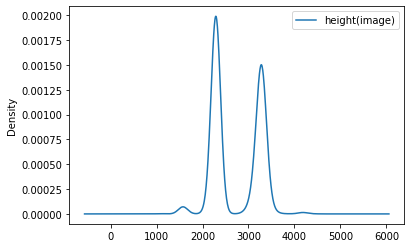

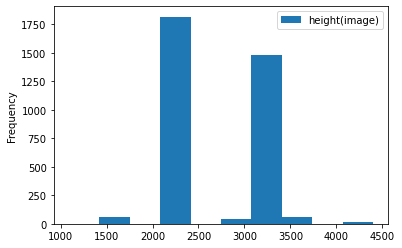

In [ ]:
# viewing statistics for height(image)
# saving the numerical values in a list
height_imgs = [i for i in imgpath_text_df['height(image)'] if i!='None']

# converting to DataFrame
height_imgs_df = pd.DataFrame(height_imgs, columns=['height(image)'])

# viewing the statistics
display(height_imgs_df.describe(include='all'))

# viewing most frequent values
print('\nMost frequent height of image:\n',height_imgs_df['height(image)'].mode()[0])

height_imgs_df.plot(kind='kde')
height_imgs_df.plot(kind='hist')

###**viewing summary statistics of width data and viewing the distribution plot collectively**

,width(image)
count,3482.000000
mean,2094.616025
std,426.237057
min,817.000000
25%,1728.000000
50%,1728.000000
75%,2544.000000
max,3520.000000



Most frequent width of image:
 1728


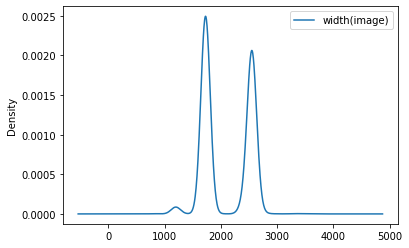

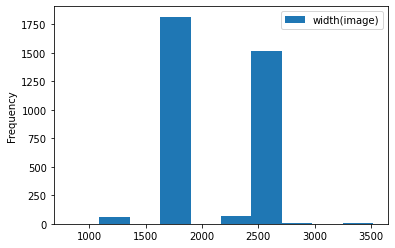

In [ ]:
# viewing statistics for width(image)
# saving the numerical values in a list
width_imgs = [i for i in imgpath_text_df['width(image)'] if i!='None']

# converting to DataFrame
width_imgs_df = pd.DataFrame(width_imgs, columns=['width(image)'])

# viewing the statistics
display(width_imgs_df.describe())

# viewing most frequent values
print('\nMost frequent width of image:\n',width_imgs_df['width(image)'].mode()[0])

width_imgs_df.plot(kind='kde')
width_imgs_df.plot(kind='hist')

###**viewing summary statistics of height data and viewing the distribution plot for each label**

,height(image)_Note
count,201.000000
mean,2916.502488
std,514.826001
min,1575.000000
25%,2292.000000
50%,3266.000000
75%,3296.000000
max,4189.000000



Most frequent height of Note :
 2292

For Note:



,height(image)_Form
count,431.000000
mean,2783.784223
std,527.494907
min,2156.000000
25%,2292.000000
50%,2292.000000
75%,3295.000000
max,4192.000000



Most frequent height of Form :
 2292

For Form:



,height(image)_Email
count,599.000000
mean,2287.686144
std,23.854246
min,2156.000000
25%,2292.000000
50%,2292.000000
75%,2292.000000
max,2292.000000



Most frequent height of Email :
 2292

For Email:



,height(image)_Letter
count,567.00000
mean,2895.66843
std,477.01846
min,2156.00000
25%,2292.00000
50%,3218.00000
75%,3278.00000
max,4400.00000



Most frequent height of Letter :
 2292

For Letter:



,height(image)_News
count,188.000000
mean,2800.648936
std,557.153935
min,1575.000000
25%,2292.000000
50%,3206.500000
75%,3296.000000
max,4155.000000



Most frequent height of News :
 2292

For News:



,height(image)_ADVE
count,230.000000
mean,2750.952174
std,586.152187
min,1089.000000
25%,2292.000000
50%,2292.000000
75%,3295.500000
max,4192.000000



Most frequent height of ADVE :
 2292

For ADVE:



,height(image)_Memo
count,620.000000
mean,2848.164516
std,564.740659
min,1575.000000
25%,2292.000000
50%,3225.500000
75%,3296.000000
max,3508.000000



Most frequent height of Memo :
 2292

For Memo:



,height(image)_Resume
count,120.000000
mean,2349.508333
std,250.789744
min,1575.000000
25%,2292.000000
50%,2292.000000
75%,2292.000000
max,3296.000000



Most frequent height of Resume :
 2292

For Resume:



,height(image)_Scientific
count,261.000000
mean,2797.892720
std,513.683991
min,1575.000000
25%,2292.000000
50%,3010.000000
75%,3296.000000
max,4107.000000



Most frequent height of Scientific :
 2292

For Scientific:



,height(image)_Report
count,265.000000
mean,2890.105660
std,497.547778
min,1575.000000
25%,2292.000000
50%,3236.000000
75%,3279.000000
max,3532.000000



Most frequent height of Report :
 2292

For Report:



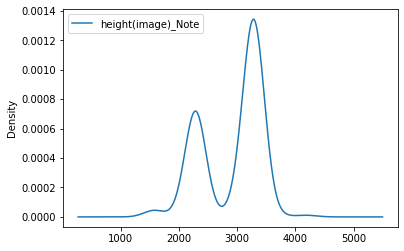

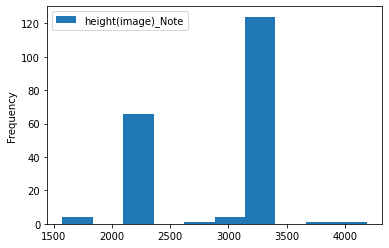

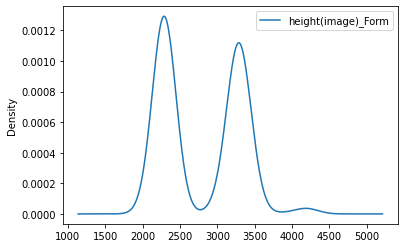

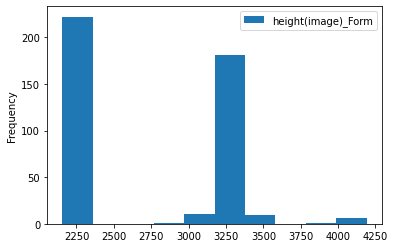

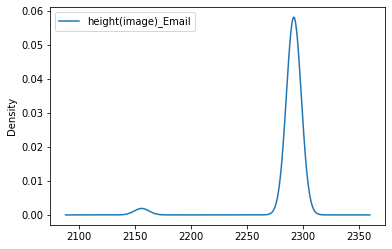

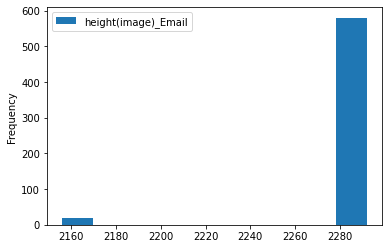

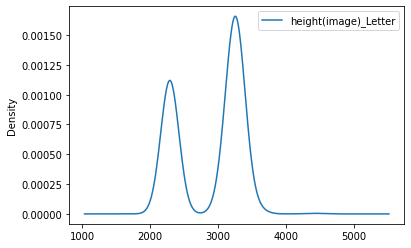

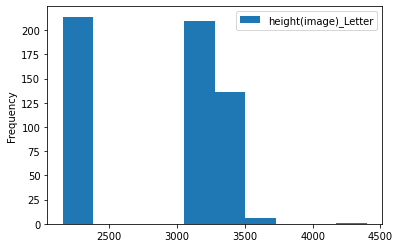

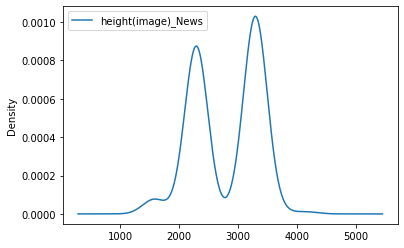

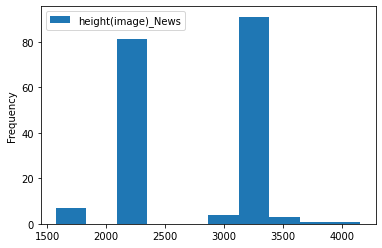

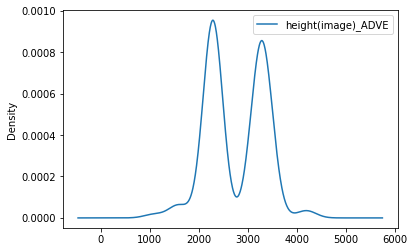

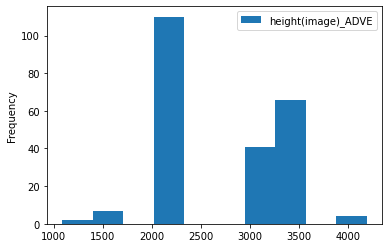

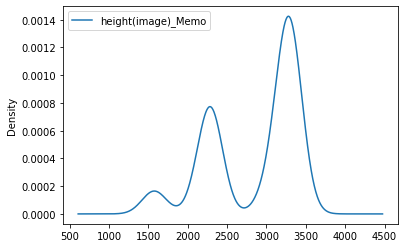

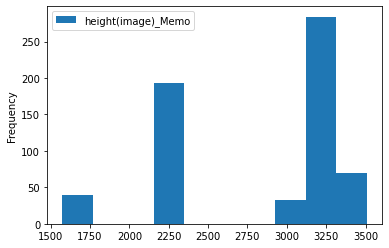

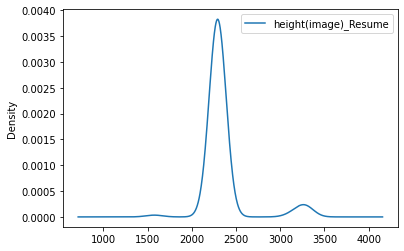

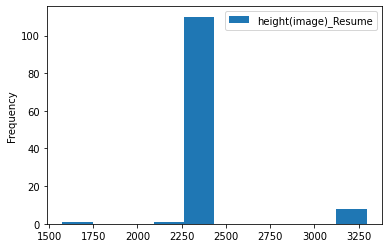

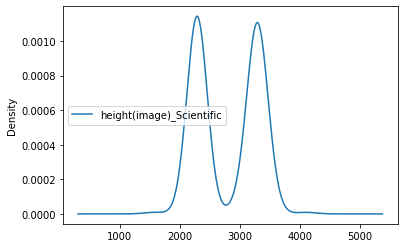

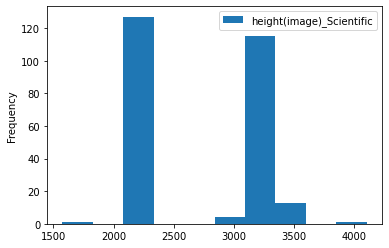

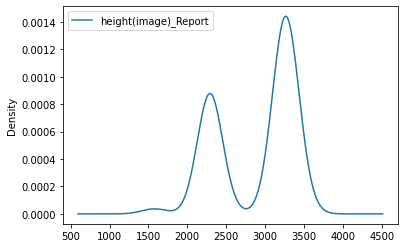

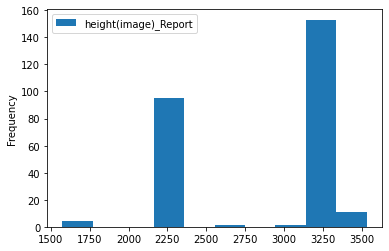

In [ ]:
# viewing the statistics of height data for each label separately

for label in list(imgpath_text_df['label'].unique()):
  h_l = [i for i in imgpath_text_df[imgpath_text_df['label']==label]['height(image)'] if i!='None']
  
  # converting to DataFrame
  h_l_df = pd.DataFrame(h_l, columns=['height(image)_'+label])

  # viewing the statistics
  display(h_l_df.describe(include='all'))

  # viewing most frequent values
  print('\nMost frequent height of '+label+' :\n',h_l_df['height(image)_'+label].mode()[0])
  
  # plotting distribution
  print('\nFor '+label+':\n')
  h_l_df.plot(kind='kde')
  h_l_df.plot(kind='hist')

###**viewing summary statistics of width data and viewing the distribution plot for each label**

,width(image)_Note
count,201.000000
mean,2247.880597
std,411.275851
min,1200.000000
25%,1728.000000
50%,2544.000000
75%,2560.000000
max,2592.000000



Most frequent width of Note :
 2560

For Note:



,width(image)_Form
count,431.000000
mean,2127.865429
std,412.941609
min,1728.000000
25%,1728.000000
50%,1728.000000
75%,2560.000000
max,2560.000000



Most frequent width of Form :
 1728

For Form:



,width(image)_Email
count,599.0
mean,1728.0
std,0.0
min,1728.0
25%,1728.0
50%,1728.0
75%,1728.0
max,1728.0



Most frequent width of Email :
 1728

For Email:



,width(image)_Letter
count,567.000000
mean,2234.860670
std,398.257202
min,1728.000000
25%,1728.000000
50%,2544.000000
75%,2544.000000
max,3392.000000



Most frequent width of Letter :
 2544

For Letter:



,width(image)_News
count,188.000000
mean,2146.978723
std,444.735215
min,1200.000000
25%,1728.000000
50%,2544.000000
75%,2560.000000
max,2560.000000



Most frequent width of News :
 1728

For News:



,width(image)_ADVE
count,230.000000
mean,2111.043478
std,458.301685
min,817.000000
25%,1728.000000
50%,1728.000000
75%,2550.000000
max,3296.000000



Most frequent width of ADVE :
 1728

For ADVE:



,width(image)_Memo
count,620.000000
mean,2210.683871
std,464.203868
min,1200.000000
25%,1728.000000
50%,2560.000000
75%,2560.000000
max,3520.000000



Most frequent width of Memo :
 2560

For Memo:



,width(image)_Resume
count,120.000000
mean,1776.791667
std,208.781535
min,1200.000000
25%,1728.000000
50%,1728.000000
75%,1728.000000
max,2560.000000



Most frequent width of Resume :
 1728

For Resume:



,width(image)_Scientific
count,261.000000
mean,2142.160920
std,412.725636
min,1200.000000
25%,1728.000000
50%,2496.000000
75%,2560.000000
max,2560.000000



Most frequent width of Scientific :
 1728

For Scientific:



,width(image)_Report
count,265.000000
mean,2227.041509
std,410.095113
min,1200.000000
25%,1728.000000
50%,2544.000000
75%,2544.000000
max,2752.000000



Most frequent width of Report :
 2544

For Report:



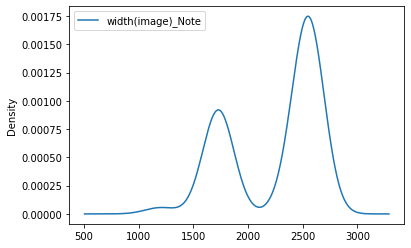

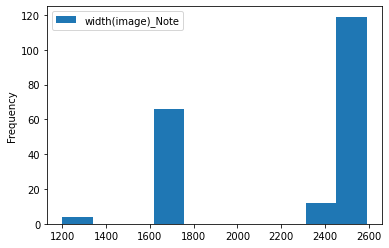

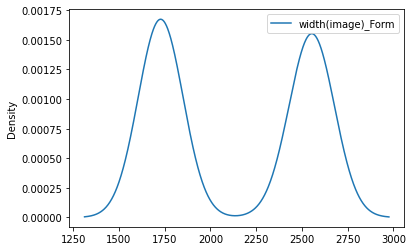

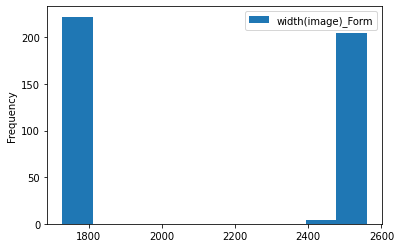

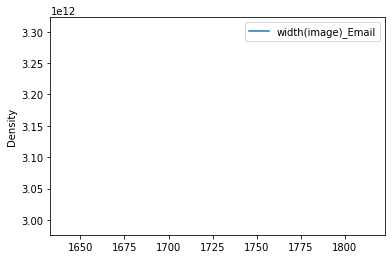

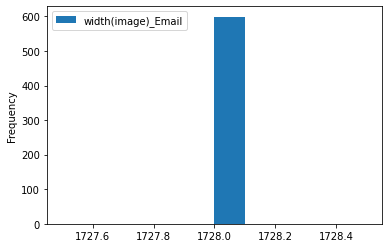

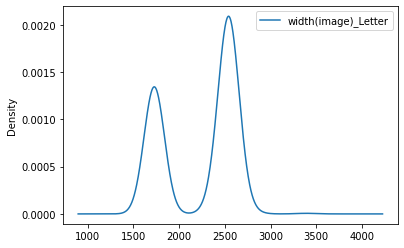

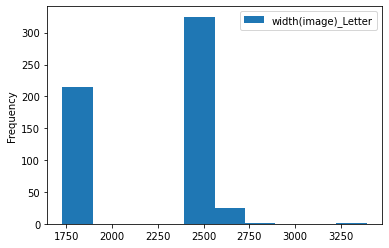

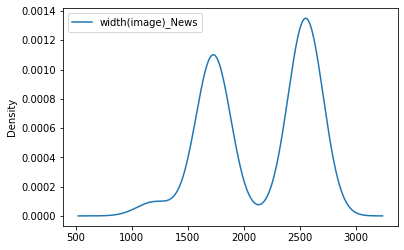

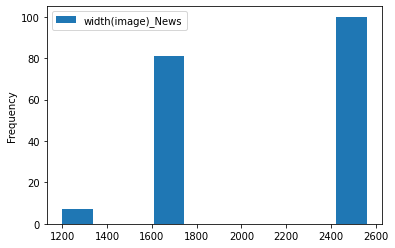

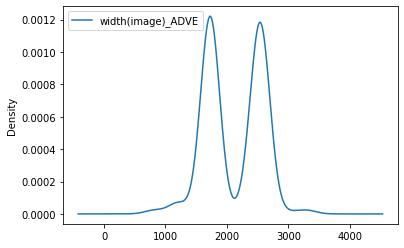

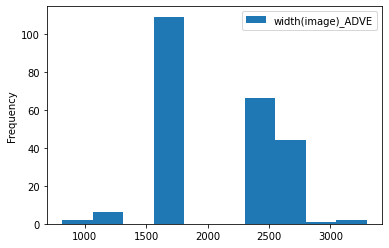

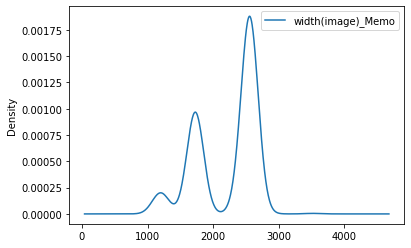

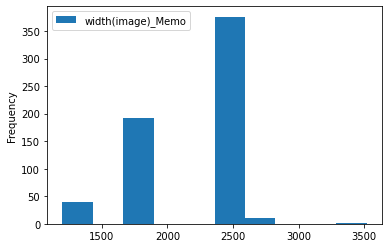

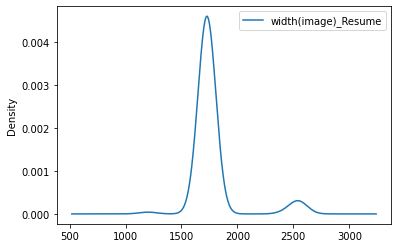

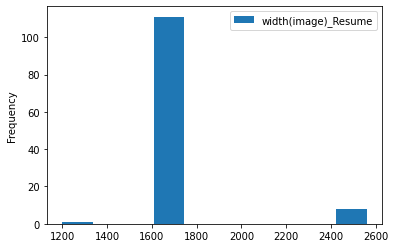

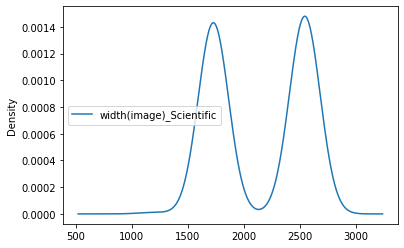

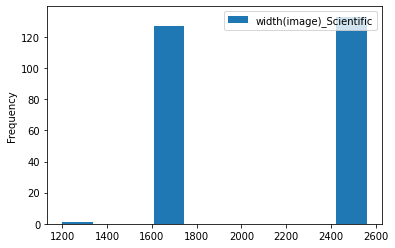

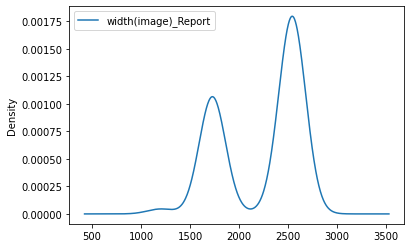

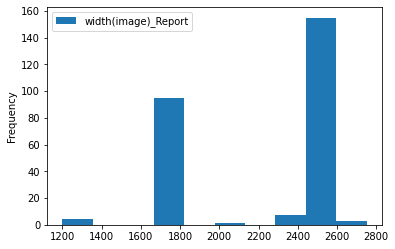

In [ ]:
# viewing the statistics of width data for each label separately

for label in list(imgpath_text_df['label'].unique()):
  w_l = [i for i in imgpath_text_df[imgpath_text_df['label']==label]['width(image)'] if i!='None']
  
  # converting to DataFrame
  w_l_df = pd.DataFrame(w_l, columns=['width(image)_'+label])

  # viewing the statistics
  display(w_l_df.describe())

  # viewing most frequent values
  print('\nMost frequent width of '+label+' :\n',w_l_df['width(image)_'+label].mode()[0])
  
  # plotting distribution
  print('\nFor '+label+':\n')
  w_l_df.plot(kind='kde')
  w_l_df.plot(kind='hist')

###**getting maximum, minimum and most frequent height for each type of label**

####**Minimum Height**

,height(image)
label,
ADVE,1089
Email,2156
Form,2156
Letter,2156
Memo,1575
News,1575
Note,1575
Report,1575
Resume,1575


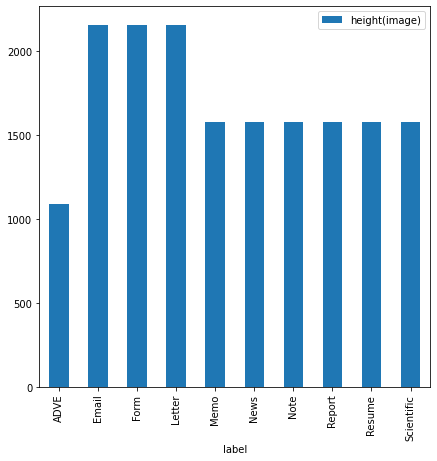

In [ ]:
# grouping by and plotting minimum height for each type of image
df_h_temp = imgpath_text_df[['label','height(image)']][imgpath_text_df['height(image)']!='None']
t = df_h_temp.groupby('label').agg('min')
display(t)
t.plot(kind='bar',figsize=(7,7))

####**Maximum Height**

,height(image)
label,
ADVE,4192
Email,2292
Form,4192
Letter,4400
Memo,3508
News,4155
Note,4189
Report,3532
Resume,3296


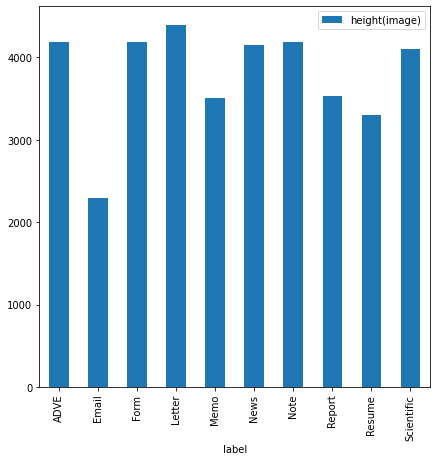

In [ ]:
# grouping by and plotting maxium height for each type of image
df_h_temp = imgpath_text_df[['label','height(image)']][imgpath_text_df['height(image)']!='None']
t = df_h_temp.groupby('label').agg('max')
display(t)
t.plot(kind='bar',figsize=(7,7))

####**Most Frequent Height**

,height(image)
label,
ADVE,2292
Email,2292
Form,2292
Letter,2292
Memo,2292
News,2292
Note,2292
Report,2292
Resume,2292


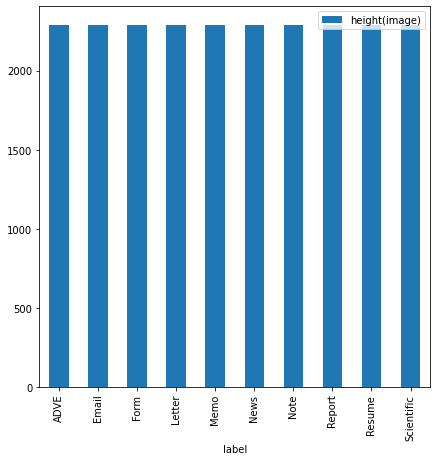

In [ ]:
# grouping by and plotting most frequent height for each type of image
df_h_temp = imgpath_text_df[['label','height(image)']][imgpath_text_df['height(image)']!='None']
t = df_h_temp.groupby('label').agg(pd.Series.mode)
display(t)
t.plot(kind='bar',figsize=(7,7))

####**Minimum Width**

,width(image)
label,
ADVE,817
Email,1728
Form,1728
Letter,1728
Memo,1200
News,1200
Note,1200
Report,1200
Resume,1200


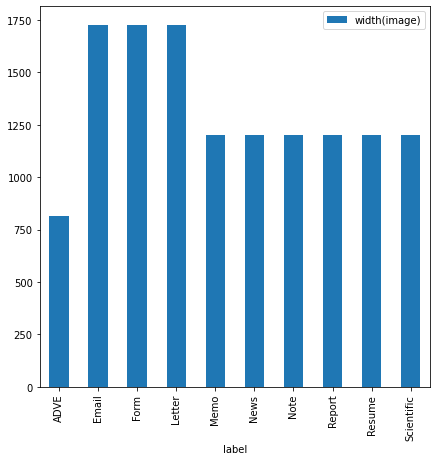

In [ ]:
# grouping by and plotting minimum width for each type of image
df_w_temp = imgpath_text_df[['label','width(image)']][imgpath_text_df['width(image)']!='None']
t = df_w_temp.groupby('label').agg('min')
display(t)
t.plot(kind='bar',figsize=(7,7))

####**Maximum Width** 

,width(image)
label,
ADVE,3296
Email,1728
Form,2560
Letter,3392
Memo,3520
News,2560
Note,2592
Report,2752
Resume,2560


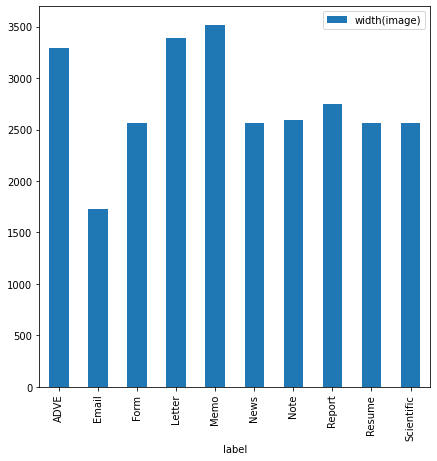

In [ ]:
# grouping by and plotting maxium width for each type of image
df_w_temp = imgpath_text_df[['label','width(image)']][imgpath_text_df['width(image)']!='None']
t = df_w_temp.groupby('label').agg('max')
display(t)
t.plot(kind='bar',figsize=(7,7))

####**Most Frequent Width**

,width(image)
label,
ADVE,1728
Email,1728
Form,1728
Letter,2544
Memo,2560
News,1728
Note,2560
Report,2544
Resume,1728


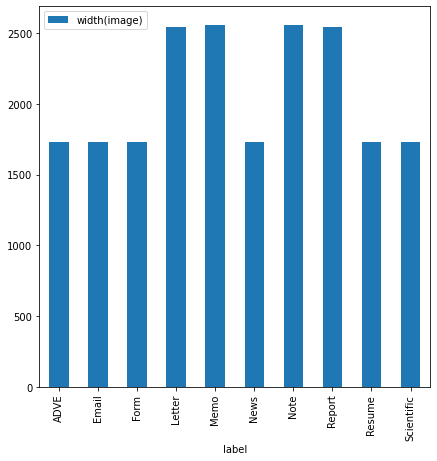

In [ ]:
# grouping by and plotting most frequent width for each type of image
df_w_temp = imgpath_text_df[['label','width(image)']][imgpath_text_df['width(image)']!='None']
t = df_w_temp.groupby('label').agg(pd.Series.mode)
display(t)
t.plot(kind='bar',figsize=(7,7))

##**Getting the space occupied by images (in bytes)**

In [ ]:
# getting image size (bytes)
img_space = []
for path in imgpath_text_df['path']:
  try:
    img_size = os.stat(path).st_size
    img_space.append(img_size)
  except:
    img_space.append('None')

imgpath_text_df['space'] = img_space

display(imgpath_text_df)

,label,path,text,clean_text,format,type,width(image),height(image),space
0,Note,/content/Dataset/Note/2073440248.jpg,\n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...,arthur c padoan erz rvyelo iv g,JPEG,L,1728,2292,176840
1,Note,/content/Dataset/Note/2048858141.jpg,et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...,et ao cacgion cas py heap,JPEG,L,1728,2292,335268
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...,JPEG,L,2544,3296,586320
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...,JPEG,L,2400,3150,182427
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...,JPEG,L,2560,3296,1314201
...,...,...,...,...,...,...,...,...,...
3487,Report,/content/Dataset/Report/507963083_507963090.jpg,104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...,dr rainer wendeborn thomas leutner rhone poule...,JPEG,L,2544,3498,606054
3488,Report,/content/Dataset/Report/507767713_507767722.jpg,\n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...,special public relations programs en backgroun...,JPEG,L,2544,3201,573275
3489,Report,/content/Dataset/Report/507745286_507745288.jpg,"\n\n \n\n \n\n& Tobacco Company Cot, Me ...",tobacco company cot me a bhi usyi horizon reta...,JPEG,L,2544,3267,968533
3490,Report,/content/Dataset/Report/510907182_510907183.jpg,MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...,maryland tobacco southern maryland tobacco boa...,JPEG,L,2544,3222,1006717


In [ ]:
# viewing the number of unique values
imgpath_text_df['space'].nunique()

3480

##**Exploring the space data of images, both, collectively and individually**

###**viewing summary statistics and distribution plot of space data collectively**

,space
count,3.492000e+03
mean,5.217789e+05
std,4.099522e+05
min,1.382400e+04
25%,2.440962e+05
50%,4.351510e+05
75%,7.008300e+05
max,5.078784e+06



Most frequent space of image:
 155970


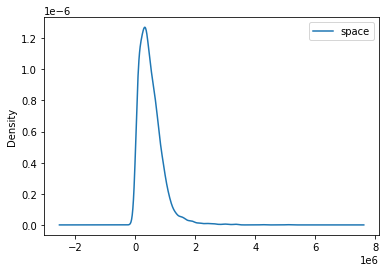

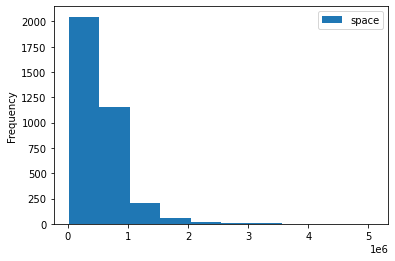

In [ ]:
# viewing statistics for space
# saving the numerical values in a list
space_imgs = [i for i in imgpath_text_df['space'] if i!='None']

# converting to DataFrame
space_imgs_df = pd.DataFrame(space_imgs, columns=['space'])

# viewing the statistics
display(space_imgs_df.describe(include='all'))

# viewing most frequent values
print('\nMost frequent space of image:\n',space_imgs_df['space'].mode()[0])

space_imgs_df.plot(kind='kde')
space_imgs_df.plot(kind='hist')

###**viewing the summary statistics and distribution plot of space data for each type of label**

,space_Note
count,2.020000e+02
mean,3.751004e+05
std,4.354607e+05
min,2.070600e+04
25%,1.335380e+05
50%,2.329240e+05
75%,4.812655e+05
max,3.318452e+06



Most frequent space of Note :
 20706

For Note:



,space_Form
count,4.320000e+02
mean,4.968874e+05
std,2.808053e+05
min,4.761600e+04
25%,2.952885e+05
50%,4.226015e+05
75%,6.315475e+05
max,2.060825e+06



Most frequent space of Form :
 47616

For Form:



,space_Email
count,600.000000
mean,152403.756667
std,104723.530745
min,13824.000000
25%,75189.750000
50%,113258.000000
75%,190365.000000
max,580473.000000



Most frequent space of Email :
 60693

For Email:



,space_Letter
count,5.680000e+02
mean,5.503542e+05
std,2.745826e+05
min,5.683200e+04
25%,3.417388e+05
50%,5.207610e+05
75%,7.004675e+05
max,2.418394e+06



Most frequent space of Letter :
 56832

For Letter:



,space_News
count,1.890000e+02
mean,9.302995e+05
std,5.007930e+05
min,7.693400e+04
25%,5.712470e+05
50%,8.887540e+05
75%,1.177673e+06
max,2.646125e+06



Most frequent space of News :
 76934

For News:



,space_ADVE
count,2.310000e+02
mean,8.977114e+05
std,7.789980e+05
min,6.319000e+04
25%,3.957840e+05
50%,6.052240e+05
75%,1.192868e+06
max,5.078784e+06



Most frequent space of ADVE :
 155970

For ADVE:



,space_Memo
count,6.210000e+02
mean,5.099754e+05
std,3.019367e+05
min,1.122990e+05
25%,3.044900e+05
50%,4.335600e+05
75%,6.651050e+05
max,2.616242e+06



Most frequent space of Memo :
 112299

For Memo:



,space_Resume
count,1.210000e+02
mean,5.567991e+05
std,1.967121e+05
min,8.372500e+04
25%,3.917630e+05
50%,5.611630e+05
75%,6.880690e+05
max,1.133496e+06



Most frequent space of Resume :
 83725

For Resume:



,space_Scientific
count,2.620000e+02
mean,6.932120e+05
std,3.452015e+05
min,1.086810e+05
25%,4.340830e+05
50%,6.850570e+05
75%,8.937475e+05
max,2.389388e+06



Most frequent space of Scientific :
 108681

For Scientific:



,space_Report
count,2.660000e+02
mean,6.717899e+05
std,2.831281e+05
min,5.478400e+04
25%,4.639540e+05
50%,6.431700e+05
75%,8.447110e+05
max,1.703205e+06



Most frequent space of Report :
 54784

For Report:



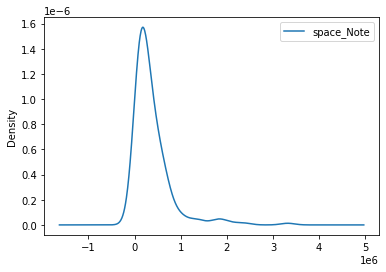

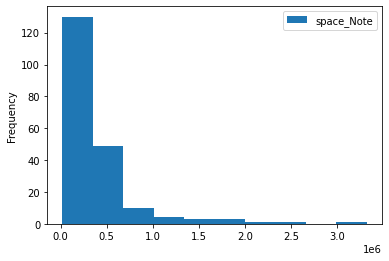

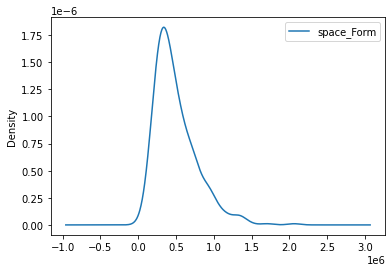

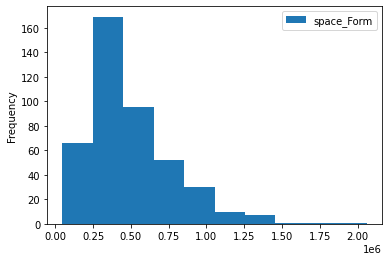

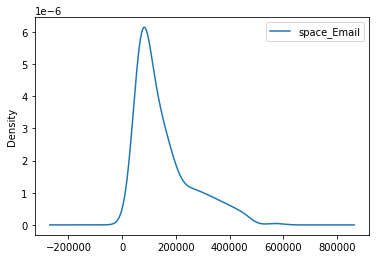

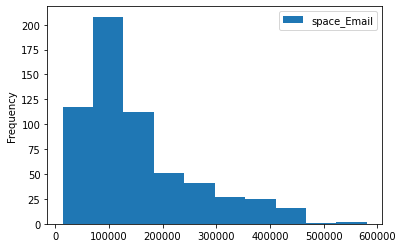

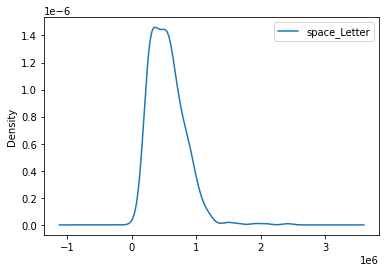

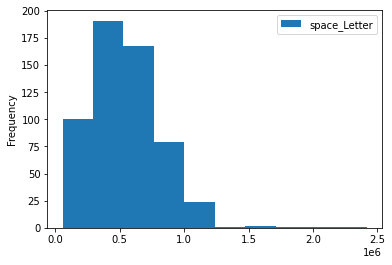

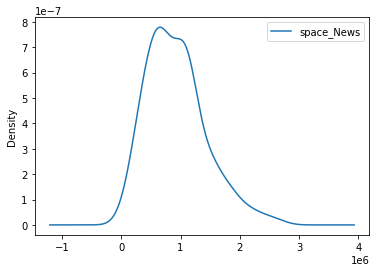

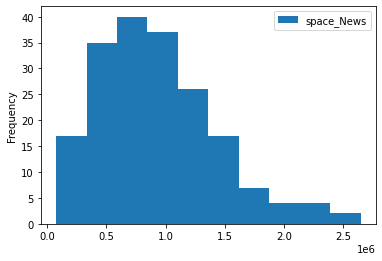

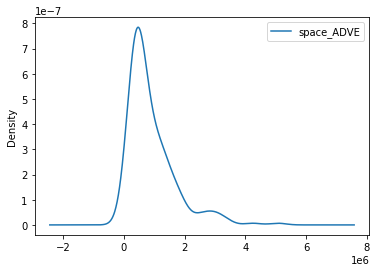

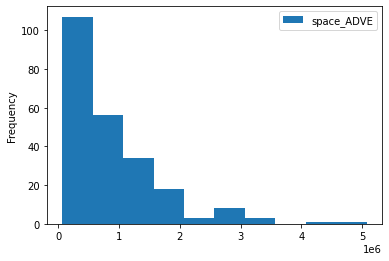

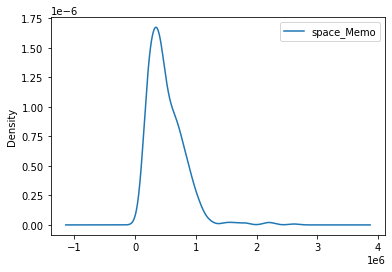

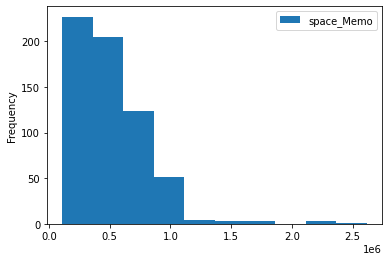

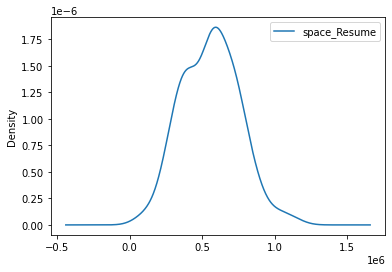

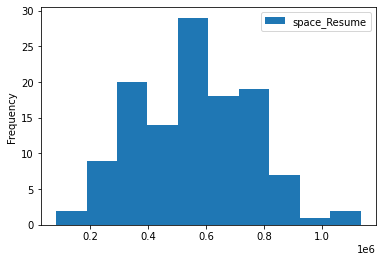

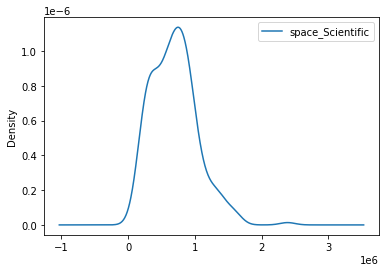

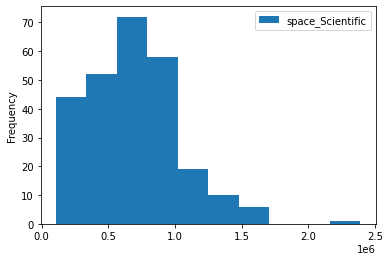

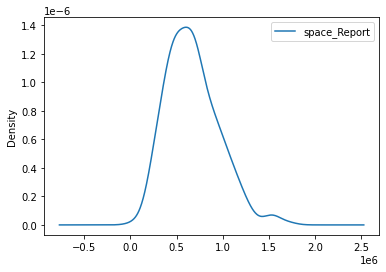

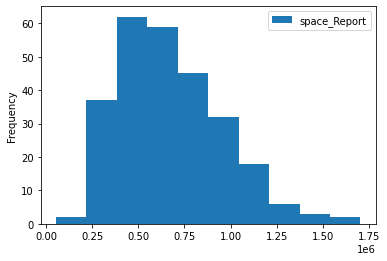

In [ ]:
# viewing the statistics of space for each label separately

for label in list(imgpath_text_df['label'].unique()):
  s_l = [i for i in imgpath_text_df[imgpath_text_df['label']==label]['space'] if i!='None']
  
  # converting to DataFrame
  s_l_df = pd.DataFrame(s_l, columns=['space_'+label])

  # viewing the statistics
  display(s_l_df.describe(include='all'))

  # viewing most frequent values
  print('\nMost frequent space of '+label+' :\n',s_l_df['space_'+label].mode()[0])
  
  # plotting distribution
  print('\nFor '+label+':\n')
  s_l_df.plot(kind='kde')
  s_l_df.plot(kind='hist')

###**getting maximum and minimum space for each type of label**

####**Minimum Space**

,space
label,
ADVE,63190
Email,13824
Form,47616
Letter,56832
Memo,112299
News,76934
Note,20706
Report,54784
Resume,83725


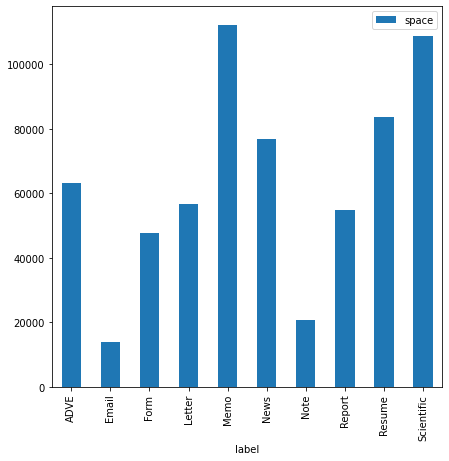

In [113]:
# grouping by and plotting minimum space for each type of image
df_s_temp = imgpath_text_df[['label','space']][imgpath_text_df['space']!='None']
t = df_s_temp.groupby('label').agg('min')
display(t)
t.plot(kind='bar',figsize=(7,7))

####**Maximum Space**

,width(image)
label,
ADVE,3296
Email,1728
Form,2560
Letter,3392
Memo,3520
News,2560
Note,2592
Report,2752
Resume,2560


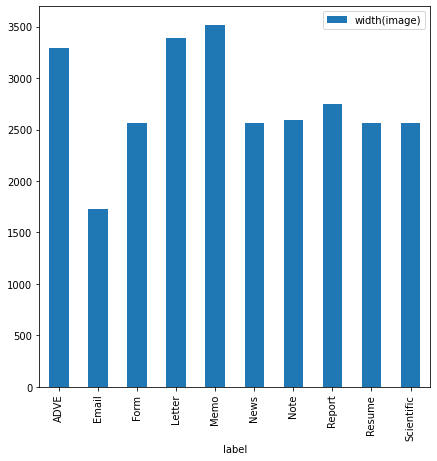

In [114]:
# grouping by and plotting maxium space for each type of image
df_s_temp = imgpath_text_df[['label','space']][imgpath_text_df['space']!='None']
t = df_w_temp.groupby('label').agg('max')
display(t)
t.plot(kind='bar',figsize=(7,7))

##**Exporting the final dataset**

In [115]:
imgpath_text_df.to_csv('/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Data_2/imgpath_text_df_img_details.csv', index=False)